In [1]:
import numpy as np
import netCDF4 as nc
import datetime as dt
from matplotlib import pyplot as plt
import sys
sys.path.insert(0, '/home/eolson/pyCode/notebooks/NorthernNitrate/paperFigs/')
import NorthNut as nn
%matplotlib inline

NorthNut defined variables: ig0,ig1,jg0,jg1,fformat0
NorthNut defined variables: vmask, vmask0, umask, umask0, tmask, fmask, gdept,  gdept_1d, e1t, e2t, e12t, e1f, e2f, e1v, e2u, e3t_1d
NorthNut defined variables: boxCol, colL, colR, arrowwidth, headwidth, headlength, alen, toff, apw, apk


### 1st compile N transports across sections that were output from the model

In [24]:
f1=nc.Dataset('/data/eolson/results/MEOPAR/SS36runs/linkHC201812/06dec17/SalishSea_1h_20171206_20171206_VT1_20.nc')
f2=nc.Dataset('/data/eolson/results/MEOPAR/SS36runs/linkHC201812/06dec17/SalishSea_1h_20171206_20171206_VT2_20.nc')

In [25]:
f1

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    name: SalishSea_1h_20171201_20171210
    description: section 1 N transports
    title: section 1 N transports
    Conventions: CF-1.6
    timeStamp: 2019-Jan-16 19:24:43 GMT
    uuid: c93dc63a-8e73-4359-a924-9121a52e2a5f
    dimensions(sizes): axis_nbounds(2), x(26), y(1), nvertex(4), depthv(40), time_counter(24)
    variables(dimensions): float32 nav_lat(y,x), float32 nav_lon(y,x), float32 bounds_lon(y,x,nvertex), float32 bounds_lat(y,x,nvertex), float32 area(y,x), float32 depthv(depthv), float32 depthv_bounds(depthv,axis_nbounds), float32 NO3_VT(time_counter,depthv,y,x), float64 time_centered(time_counter), float64 time_centered_bounds(time_counter,axis_nbounds), float64 time_counter(time_counter), float64 time_counter_bounds(time_counter,axis_nbounds), float32 VLDFNO3(time_counter,depthv,y,x)
    groups: 

In [26]:
np.shape(f1.variables['NO3_VT'])

(24, 40, 1, 26)

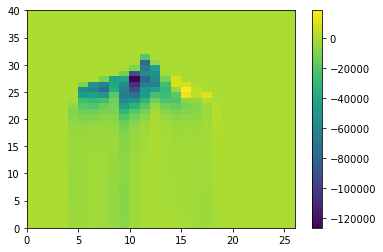

In [27]:
plt.pcolormesh(f1.variables['NO3_VT'][0,:,0,:])
plt.colorbar()

In [28]:
np.shape(f2.variables['NO3_VT'])

(24, 40, 1, 67)

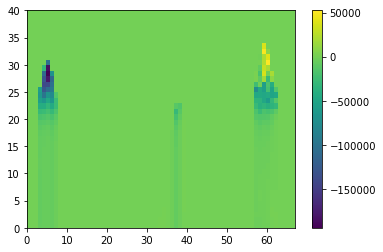

In [29]:
plt.pcolormesh(f2.variables['NO3_VT'][0,:,0,:])
plt.colorbar()

In [30]:
fmask=nc.Dataset('/ocean/eolson/MEOPAR/NEMO-forcing/grid/mesh_mask201702_noLPE.nc')
tmask=fmask.variables['tmask'][:,:,:,:]
e1v=fmask.variables['e1v'][:,:]
e2v=fmask.variables['e2v'][:,:]
e1t=fmask.variables['e1t'][:,:]
e2t=fmask.variables['e2t'][:,:]
vmask=fmask.variables['vmask'][:,:,:,:]
umask=fmask.variables['umask'][:,:,:,:]
e3t_0=fmask.variables['e3t_0'][:,:,:,:]
e3v_0=fmask.variables['e3v_0'][:,:,:,:]
e3u_0=fmask.variables['e3u_0'][:,:,:,:]

(49.5, 51)

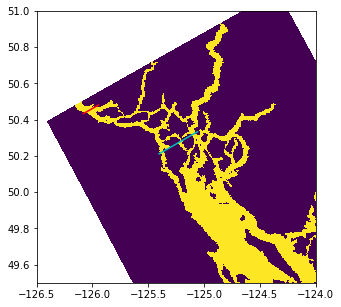

In [31]:
fig,ax=plt.subplots(1,1,figsize=(5,5))
ax.pcolormesh(fmask.variables['nav_lon'][:,:],fmask.variables['nav_lat'][:,:],fmask.variables['tmask'][0,0,:,:])
ax.plot(f1.variables['nav_lon'][0,:],f1.variables['nav_lat'][0,:],'r-');
ax.plot(f2.variables['nav_lon'][0,:],f2.variables['nav_lat'][0,:],'c-');
ax.set_xlim((-126.5,-124))
ax.set_ylim((49.5,51))

In [32]:
fig,ax=plt.subplots(1,1,figsize=())

array([[-126.080605, -126.07521 , -126.06982 , -126.06443 , -126.05904 ,
        -126.05366 , -126.04827 , -126.04289 , -126.03751 , -126.032135,
        -126.02676 , -126.021385, -126.016014, -126.01064 , -126.00528 ,
        -125.999916, -125.99455 , -125.98919 , -125.983826, -125.97847 ,
        -125.973114, -125.96776 , -125.96241 , -125.957054, -125.951706,
        -125.94636 ]], dtype=float32)

In [35]:
fmask.variables['nav_lon'][884,50:(50+26)]

array([-126.08222 , -126.07683 , -126.071434, -126.06605 , -126.06065 ,
       -126.05527 , -126.04989 , -126.0445  , -126.03912 , -126.033745,
       -126.02837 , -126.022995, -126.017624, -126.01226 , -126.00689 ,
       -126.001526, -125.99616 , -125.9908  , -125.985435, -125.98008 ,
       -125.974724, -125.96937 , -125.96401 , -125.958664, -125.953316,
       -125.94797 ], dtype=float32)

In [11]:
np.shape(f1.variables['nav_lon'][:,:])

(1, 26)

In [12]:
def dayarray(t0,t1,interval=1):
    tlist=(t0,)
    while tlist[-1]<t1:
        tlist=tlist+(tlist[-1]+dt.timedelta(days=1),)
    return tlist

In [13]:
t0=dt.datetime(2015,1,1)
t1=dt.datetime(2016,1,1)
tlist=dayarray(t0,t1,1)

In [14]:
fformatD='%d%b%y/'
fformat1='SalishSea_1h_%Y%m%d_%Y%m%d_VT1_20.nc'
fformat2='SalishSea_1h_%Y%m%d_%Y%m%d_VT2_20.nc'
idir='/data/eolson/results/MEOPAR/SS36runs/linkHC201812/'

In [15]:
VT1=np.zeros((len(tlist)*24,40,26))
VLDF1=np.zeros((len(tlist)*24,40,26))
VT2=np.zeros((len(tlist)*24,40,67))
VLDF2=np.zeros((len(tlist)*24,40,67))
ind=-1
for idt0 in tlist:
    ind=ind+1
    cdir=idt0.strftime(fformatD).lower()
    sff1=idir+cdir+idt0.strftime(fformat1)
    sff2=idir+cdir+idt0.strftime(fformat2)
    with nc.Dataset(sff1) as f1, nc.Dataset(sff2) as f2:
        VT1[(ind*24):(ind*24+24),:,:]=f1.variables['NO3_VT'][:,:,0,:]
        VLDF1[(ind*24):(ind*24+24),:,:]=f1.variables['VLDFNO3'][:,:,0,:]
        VT2[(ind*24):(ind*24+24),:,:]=f2.variables['NO3_VT'][:,:,0,:]
        VLDF2[(ind*24):(ind*24+24),:,:]=f2.variables['VLDFNO3'][:,:,0,:]

In [16]:
np.shape(VT1)

(8784, 40, 26)

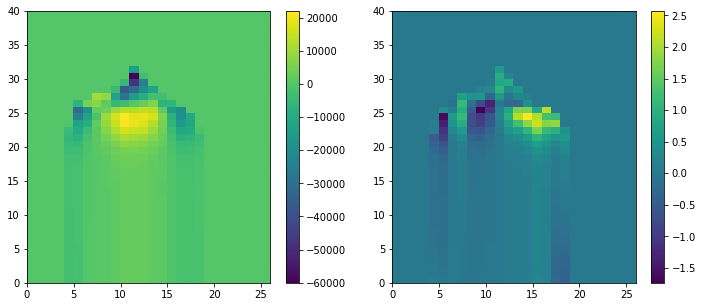

In [17]:
fig,ax=plt.subplots(1,2,figsize=(12,5))
m1=ax[0].pcolormesh(np.mean(VT1[:,:,:],0))
plt.colorbar(m1,ax=ax[0])
m2=ax[1].pcolormesh(np.mean(VLDF1[:,:,:],0))
plt.colorbar(m2,ax=ax[1])

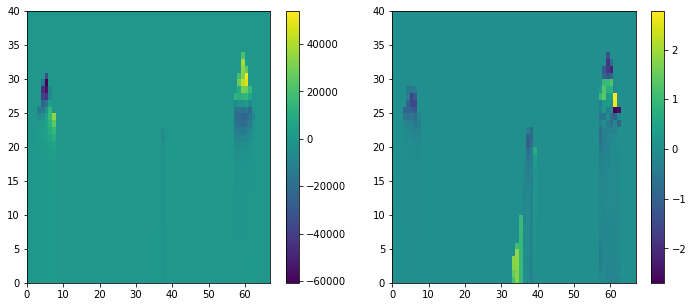

In [18]:
fig,ax=plt.subplots(1,2,figsize=(12,5))
m1=ax[0].pcolormesh(np.mean(VT2[:,:,:],0))
plt.colorbar(m1,ax=ax[0])
m2=ax[1].pcolormesh(np.mean(VLDF2[:,:,:],0))
plt.colorbar(m2,ax=ax[1])

In [19]:
np.sum(np.mean(VT1[:,:,:],0)),np.sum(np.mean(VT2[:,:,:],0))

(-109873.9376909051, -62493.98624860562)

In [20]:
np.sum(np.mean(VLDF1[:,:,:],0)),np.sum(np.mean(VLDF2[:,:,:],0))

(36.00302726469185, -35.45006239519209)

In [21]:
# units for NO3_VT    v*dx*dz*C = mmol N/s 
# mmol N/s * (1e-3 mol/mmol) * (62 g/mol m.w. NO3) * (1e-3 kg/g)
# compare below with Kh2018's 3 kg/s:
np.sum(np.mean(VT1[:,:,:],0))*1e-3*62*1e-3, np.sum(np.mean(VT2[:,:,:],0))*1e-3*62*1e-3

(-6.812184136836117, -3.8746271474135487)

### try post calculation and compare with live calculation 

In [22]:
tlist=dayarray(t0,dt.datetime(2015,1,5),1)
fformatD='%d%b%y/'
fformat1='SalishSea_1h_%Y%m%d_%Y%m%d_VT1_20.nc'
fformat2='SalishSea_1h_%Y%m%d_%Y%m%d_VT2_20.nc'
fformatV='SalishSea_1h_%Y%m%d_%Y%m%d_grid_V.nc'
fformate='SalishSea_1h_%Y%m%d_%Y%m%d_carp_T.nc'
idir='/data/eolson/results/MEOPAR/SS36runs/linkHC201812/'

In [ ]:
VT1=np.zeros((len(tlist)*24,40,26))
VLDF1=np.zeros((len(tlist)*24,40,26))
VT2=np.zeros((len(tlist)*24,40,67))
VLDF2=np.zeros((len(tlist)*24,40,67))
VT1C=np.zeros((len(tlist)*24,40,26))
VLDF1C=np.zeros((len(tlist)*24,40,26))
VT2C=np.zeros((len(tlist)*24,40,67))
VLDF2C=np.zeros((len(tlist)*24,40,67))
ind=-1
for idt0 in tlist:
    ind=ind+1
    cdir=idt0.strftime(fformatD).lower()
    sff1=idir+cdir+idt0.strftime(fformat1)
    sff2=idir+cdir+idt0.strftime(fformat2)
    sffV=idir+cdir+idt0.strftime(fformatV)
    sffe=idir+cdir+idt0.strftime(fformate)
    with nc.Dataset(sff1) as f1, nc.Dataset(sff2) as f2,
            nc.Dataset(sffV) as fV, nc.Dataset(sffe) as fe:
        VT1[(ind*24):(ind*24+24),:,:]=f1.variables['NO3_VT'][:,:,0,:]
        VLDF1[(ind*24):(ind*24+24),:,:]=f1.variables['VLDFNO3'][:,:,0,:]
        VT2[(ind*24):(ind*24+24),:,:]=f2.variables['NO3_VT'][:,:,0,:]
        VLDF2[(ind*24):(ind*24+24),:,:]=f2.variables['VLDFNO3'][:,:,0,:]
        
        e3t=
        
        VT1C[(ind*24):(ind*24+24),:,:]=f1.variables['NO3_VT'][:,:,0,:]
        VT2C[(ind*24):(ind*24+24),:,:]=f2.variables['NO3_VT'][:,:,0,:]